<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
## <font color='navy'> Teoría Moderna de Portafolios: Práctica
    
### <font color='navy'> Portafolios de Inversión

    Mtro. Sean Nicolás González Vázquez
    

###  0.- Introducción
    
Como discutimos en la clase anterior, la Teoría Moderna de Portafolios, propuesta por Markowitz y Sharpe, proporciona a los inversionistas herramientas valiosas para tomar decisiones de inversión más fundamentadas y basadas en datos.

El objetivo principal de esta teoría es determinar las ponderaciones "eficientes" de un conjunto de activos dentro de un portafolio de inversión, optimizando una métrica específica, como la varianza o el ratio de Sharpe. A este proceso se le denomina:

> **Asset Allocation**: Es el proceso de decidir cuánto capital asignar a cada activo dentro de un portafolio de inversión.
    
Ahora bien, *¿cómo podemos optimizar un portafolio en Python?*

En esta clase aprenderemos a hacerlo utilizando la librería scipy, que incluye el método minimize. A continuación, se presenta el enlace a la documentación:

+ https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
    
    
Esta función requiere los siguientes parámetros clave:

+ **fun:** La función objetivo a optimizar.
+ **x0**: Las variables iniciales que se desean ajustar.
+ **bounds**: Los rangos permitidos para las variables de decisión.
+ **constraints**: Las restricciones que deben cumplir las soluciones.
+ **tol**: Tolerancia al error, por default usaremos 1e-16.
    
Con esta base y lo aprendido previamente sobre la Teoría Moderna de Portafolios, ¡comencemos!


###   1.- Obtención de Datos y Métricas del Portafolio

Primero, descargaremos los precios de cierre ajustado para los siguientes activos *AAPL*, *MSFT* y *GOOG*, desde el `2021-01-01` hasta la fecha. 

Después obtendremos los rendimientos y las métricas de riesgo y rendimiento de los activos de manera individual.

In [1]:
# Importación de librerías
import pandas as pd
import yfinance as yf 
import numpy as np
from scipy.optimize import minimize 
import matplotlib.pyplot as plt


In [2]:
# Obtener precios
prices = yf.download(['AAPL','MSFT','GOOG'],start = '2021-01-01', end = '2025-06-10')['Close']
prices.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,GOOG,MSFT
Date,,,
2021-01-04,126.239670,85.901390,209.617142
2021-01-05,127.800484,86.531647,209.819427
2021-01-06,123.498528,86.251808,204.378937
2021-01-07,127.712692,88.834450,210.194916
2021-01-08,128.815002,89.826553,211.475616


In [3]:
# Obtener rendimiento
ret = prices.pct_change().dropna()
ret.head()

Ticker,AAPL,GOOG,MSFT
Date,,,
2021-01-05,0.012364,0.007337,0.000965
2021-01-06,-0.033662,-0.003234,-0.025929
2021-01-07,0.034123,0.029943,0.028457
2021-01-08,0.008631,0.011168,0.006093
2021-01-11,-0.023249,-0.022405,-0.009698


In [4]:
# Obtener rendimiento promedio
ret_mean = ret.mean()
ret_mean

Ticker
AAPL    0.000582
GOOG    0.000849
MSFT    0.000872
dtype: float64

In [5]:
# Obtener matriz de covariânza varianza
cov = ret.cov()
cov

Ticker,AAPL,GOOG,MSFT
Ticker,,,
AAPL,0.000325,0.000213,0.000202
GOOG,0.000213,0.000390,0.000228
MSFT,0.000202,0.000228,0.000281


Con solamente esta informacion, estamos listos para encontrar los portafolios eficientes.

###   2.- Portafolio Eficiente en Mínima Varianza
    
El portafolio eficiente en mínima varianza es aquel que proporciona el menor riesgo posible, dado un conjunto de activos financieros.

La idea central de este método es que es posible reducir el riesgo de un portafolio aprovechando las propiedades estadísticas de los rendimientos de los activos, específicamente sus covarianzas.
y varianzas.

Markowitz demostró que, al considerar cómo los rendimientos de una colección de activos se mueven conjuntamente (es decir, su covarianza), los inversores pueden construir un portafolio que minimice el riesgo.
    
El problema de optimización se define de la siguiente manera:
    
    
$$\min_w \sigma^2 = w^T \Sigma w$$
    
$$s.a. \hspace{0.5cm} \sum_{i=1}^n w_i= 1$$
$$ \hspace{0.8cm} w > 0 $$
    
    
Recuerda que `scipy` nos solicitará la función objetivo, los valores iniciales, las cotas, las restricciones y la tolerancia al error para realizar la optimización.

In [6]:
# Definir funcion objetivo
varianza = lambda w: w.T @ cov @ w

In [7]:
# Definir valores iniciales
n = len(ret.keys())
w_inicial =np.ones(n)/n
w_inicial

array([0.33333333, 0.33333333, 0.33333333])

In [8]:
# Definir las cotas
bounds = [(0,1)]*n
bounds

[(0, 1), (0, 1), (0, 1)]

In [9]:
# Definir las restricciones
restr = lambda w: sum(w)-1

In [10]:
# Definir tolerancia
tol = 1e-100

In [11]:
# Aplicar función de scipy.optimize
min_var = minimize(
    fun=varianza,
    x0=w_inicial,
    bounds=bounds,
    constraints={'fun': restr, 'type': 'eq'},
    tol=tol
)

min_var

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00024579834198521
       x: [ 3.461e-01  1.432e-01  5.106e-01]
     nit: 16
     jac: [ 4.916e-04  4.916e-04  4.916e-04]
    nfev: 79
    njev: 16

In [12]:
# Encontrar pesos eficientes 
w_minvar = min_var.x
w_minvar

array([0.34611838, 0.14323261, 0.51064901])

¡Perfecto!, ahora obtengamos las métricas de rendimiento y riesgo de este portafolio de inversion

In [13]:
# Obtener rendimiento del portafolio
red_minvar = sum(w_minvar * ret_mean)
red_minvar


0.0007680307223893473

In [14]:
# Obtener volatilidad del portafolio
vol_minvar = np.sqrt(varianza(w_minvar))
vol_minvar

0.01567795720064352

¿Parece sencillo, verdad? Aunque la implementación básica es bastante directa, imagina que quisieras optimizar múltiples portafolios. Para este tipo de escenarios, es más eficiente generar funciones de Python. Recordemos que la estructura básica para definir una función en Python es la siguiente:

def nombre_de_función(parámetro_1, ..., parámetro_n):

        ... code ...
        ... code ...
        
        return result
        
**Ejercicio:** Con esta información, crea una función llamada `opt_min_var`que reciba los rendimientos de los activos y retorne los pesos eficientes en mínima varianza.

In [15]:
# Programar funcion
def opt_min_var(ret: pd.DataFrame) -> np.ndarray:
    # Obtener matriz de covariânza varianza
    cov = ret.cov()
    # Definir funcion objetivo
    varianza = lambda w: w.T @ cov @ w
    # Definir valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n) / n
    # Definir las cotas
    bounds = [(0, 1)] * n
    # Definir las restricciones
    restr = lambda w: sum(w)-1
    # Definir tolerancia
    tol = 1e-100
    # Aplicar función de scipy.optimize
    min_var = minimize(
        fun=varianza,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': restr, 'type': 'eq'},
        tol=tol
    )
    # Encontrar pesos eficientes 
    w_minvar = min_var.x
    
    return w_minvar


In [16]:
# Verificar resultados de la función
w_minvar_func = opt_min_var(ret)

w_minvar_func



array([0.34611838, 0.14323261, 0.51064901])

#### Rendimiento diario con los pesos de min_var

In [17]:
red_minvar = sum(w_minvar_func * ret_mean)

red_minvar*100

0.07680307223893473

#### Volatilidad diaria con los pesos de min_var

In [18]:
vol_minvar2 = np.sqrt(varianza(w_minvar_func))
vol_minvar2*100

1.5677957200643517

In [19]:
vol_minvar2 == vol_minvar

True

----

### 3.- Portafolio Eficiente en Máximo de Sharpe
    
El portafolio eficiente en máximo Sharpe es aquel que maximiza la relación entre retorno y riesgo.

Esta relación se mide a través del ratio de Sharpe, que es el ratio entre el retorno en exceso a la tasa
libre de riesgo y el riesgo.

$$\max_w \hspace{0.1 cm} RS = \frac{\mu - r_f}{\sigma} = \frac{w^T \bar{r} - r_f}{\sqrt{w^T \Sigma w}}$$
    
$$s.a. \hspace{0.5cm} \sum_{i=1}^n w_i= 1$$
$$ \hspace{0.8cm} w > 0 $$
    
La tasa libre de riesgo es una referencia clave en el ámbito financiero y generalmente es conocida de antemano por el gestor de inversiones, ya que el banco central del país de referencia la publica regularmente.

Por ejemplo, la tasa de Banxico la puedes encontrar en https://www.banxico.org.mx/, y la tasa del Banco Central Americano en https://www.federalreserve.gov/releases/h15/#:~:text=As%20of%20March%201,%202016,%20the%20daily%20effective%20federal%20funds.
    
Escribe ahora una función llamada `opt_max_sharpe` que obtenga los pesos eficientes en máximo de sharpe para tu portafolio, esta recibirá los rendimientos y la tasa libre de riesgo, deberá retornar los pesos.

In [20]:
# Programar funcion
def max__sharpe(ret:pd.DataFrame,rf:float)-> np.array:

    # Input 
    E= ret.mean()
    cov = ret.cov()
    rf = rf/252

    # Función objetivo para maximizar la ratio de Sharpe
    sharpe = lambda w: -((w.T @ (E - rf)) / np.sqrt(w.T @ cov @ w))
    
    # Valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n)/n
    # Cotas
    bounds = [(0,1)]*n
    # Restricciones
    rest = lambda w: sum(w)-1
    # Tolerancia
    tol = 1e-100

    # Optimización
    max_sharpe = minimize(
        fun=sharpe,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': rest, 'type': 'eq'},
        tol=tol)
    
    w_max = max_sharpe.x

    return w_max


In [21]:
# Obtener los pesos
w_max_= max__sharpe(ret,.0395).round(4)
w_max_

array([0.    , 0.2068, 0.7932])

¡Bien hecho!, ahora encontremos las métricas de rendimiento y riesgo para el portafolio eficiente en máximo de Sharpe

#### Rendimiento del portafolio 

In [22]:
# Obtener rendimiento del portafolio
rend_max_sharpe = w_max_.T @ (ret.mean())
rend_max_sharpe*100

0.08668659828328486

#### Volatilidad del portafolio 

In [23]:
# Obtener volatilidad del portafolio
vol = np.sqrt (w_max_.T @ ret.cov() @ w_max_)
vol*100

1.6373527863876938

Ahora, comparemos la volatilidad del portafolio eficiente en máximo de sharpe con el de mínima varianza. ¿Que observas? ¿Qué pasa con el rendimiento?

###  4.- Frontera Eficiente en Media Varianza
    
La frontera eficiente en media-varianza es la sección superior de la bala de Markowitz, donde se encuentran aquellos portafolios que, para un nivel de riesgo dado, ofrecen el mayor rendimiento posible.

Estos portafolios son considerados “óptimos” porque no es posible encontrar otro portafolio con el mismo nivel de riesgo que ofrezca un rendimiento superior. Por lo tanto, los portafolios que se encuentran dentro de la frontera eficiente representan aquellas combinaciones de activos que un inversionista racional seleccionaría.

    
Para dibujar la frontera eficiente de portafolios, sigue estos pasos:

**1.- Descarga de datos**: Para un conjunto de activos financieros, descarga los precios de cierre ajustado. A partir de estos precios, calcula los rendimientos diarios.
    
**2.- Generación de portafolios aleatorios**: Genera múltiples portafolios aleatorios para explorar todas las posibles combinaciones de pesos. Utiliza la función `np.random.dirichlet` para generar combinaciones de pesos que cumplan con las restricciones necesarias: Todos los pesos deben ser mayores o iguales a cero (portafolios long-only). Los pesos deben sumar 1 (esto asegura que estás asignando todo el capital disponible).

    
 > *Distribución de Dirichlet*: Esta distribución es útil cuando se desea generar valores que sumen un total constante (en este caso, 1). Es una distribución continua multivariable que, a diferencia de otras, respeta la condición de no negatividad y normalización, lo que la hace ideal para representar pesos en portafolios. 

**3.-  Cálculo del rendimiento esperado y la volatilidad de portafolios aleatorios**: Para cada portafolio generado en el paso anterior, calcula su rendimiento esperado y su volatilidad.

**4.- Portafolio de mínima varianza**: Encuentra el portafolio con la mínima varianza. 
    

**5.- Portafolio de máximo Sharpe**: Encuentra el portafolio eficiente en máximo de Sharpe 

**6.- Gráfica de la frontera eficiente**: Grafica los portafolios aleatorios junto con los portafolios eficientes. Usa el eje x para la volatilidad (desviación estándar) y el eje y para el rendimiento. 
    
*Plus:* Puedes incluir también los activos individuales dentro de la gráfica. Esto te permitirá comparar cada activo con los portafolios eficientes y ver cuál ofrece una mejor relación riesgo-rendimiento.

In [44]:
# Generacion de portafolios aleatorios
np_port = 10000
random_w = np.random.dirichlet(np.ones(n), np_port)
# Calcular rendimientos y volatilidades
rend_aleatorios = [ret_mean.T @ random_w[w] for w in range(np_port)]
vol_aleatorios = [np.sqrt(random_w[w].T @ cov @ random_w[w]) for w in range(np_port)]

Rendimientos: Ticker
AAPL    0.000582
GOOG    0.000849
MSFT    0.000872
dtype: float64
Volatilidad: Ticker
AAPL    0.018020
GOOG    0.019754
MSFT    0.016761
dtype: float64


C:\Users\ppmel\AppData\Local\Temp\ipykernel_17700\882498555.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(ind_vol[i], ind_rend[i], marker='o', color='black', s=100)
C:\Users\ppmel\AppData\Local\Temp\ipykernel_17700\882498555.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(ind_vol[i], ind_rend[i], prices.columns[i], fontsize=12, color='black')


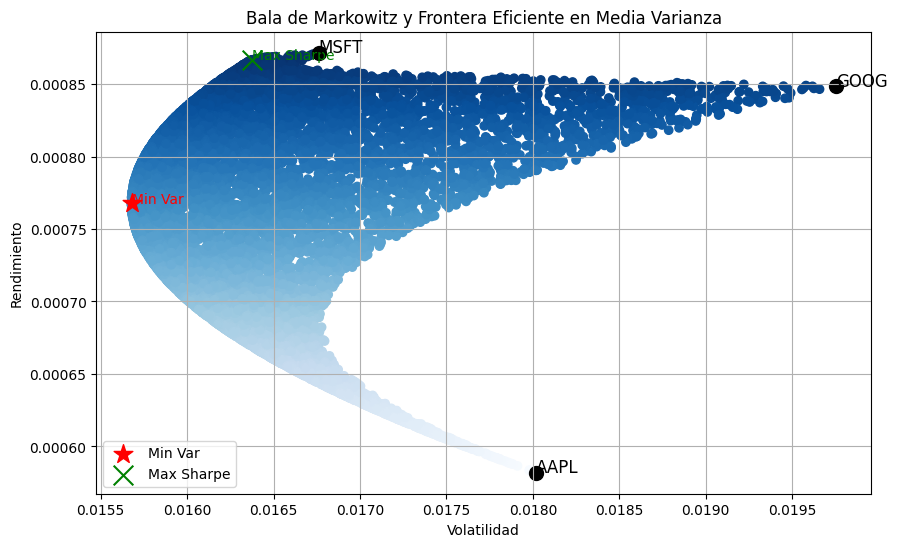

In [58]:
# Realizar grafica
plt.figure(figsize=(10,6))
# Scatter plot de portafolios aleatorios
plt.scatter(vol_aleatorios, rend_aleatorios,c= rend_aleatorios,cmap= 'Blues')

# Scatter plot de Minima Varianza
plt.scatter(vol_minvar, red_minvar, marker='*', color='red', s=200, label='Min Var')

plt.text(vol_minvar, red_minvar, 'Min Var', fontsize=10, color = 'red')


# Scatter plot de Maximo de Sharpe
plt.scatter(vol, rend_max_sharpe, marker='x', color='green', s=200, label='Max Sharpe')
plt.text(vol, rend_max_sharpe, 'Max Sharpe', fontsize=10, color = 'green')


# Nombrar eje x, y, titulo
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.title('Bala de Markowitz y Frontera Eficiente en Media Varianza') 



# Graficar coordenadas de activos individuales
ind_rend = ret.mean()
ind_vol = ret.std()
print('Rendimientos:', ind_rend)
print('Volatilidad:', ind_vol)

for i in range(n):
    plt.scatter(ind_vol[i], ind_rend[i], marker='o', color='black', s=100)
    plt.text(ind_vol[i], ind_rend[i], prices.columns[i], fontsize=12, color='black')
    plt.legend()
    plt.grid()




plt.show()

In [59]:
# Para verificar que la clave de los rendimientos es correcta


###  Conclusiones

> Los portafolios óptimos representan el **"mejor" portafolio (combinación de activos / ponderaciones) para un conjunto de activos financieros según una métrica específica**. Estos portafolios ofrecen una visión clara sobre cómo asignar el capital de manera sistemática dado un objetivo concreto.

> Aunque invertir en estos portafolios aumenta la probabilidad de obtener ganancias, es crucial tener en cuenta que estos cálculos están basados en datos históricos. La teoría de portafolios asume que las correlaciones, rendimientos y volatilidades del pasado se mantendrán constantes en el futuro, lo cual a veces no sucede: "**rendimientos pasados no aseguran rendimientos futuros**". Hay que considerar también que la inversión en portafolios, a diferencia del *trading*, es a largo plazo. 

> A pesar de esto, **el uso de metodologías cuantitativas ofrece una mejora sustancial sobre la asignación de activos basada en la intuición o el "feeling"**. La asignación *aleatoria de capital* sin un análisis cuantitativo adecuado tiende a ser ineficiente, y a menudo lleva a una sobreexposición a riesgos y sesgos cognitivos.

> Al aplicar un enfoque estructurado y basado en datos para la selección de portafolios, los inversores pueden **tomar decisiones más informadas y sistemáticas**, lo que resulta en una gestión del riesgo más adecuada y una mayor probabilidad de alcanzar sus objetivos financieros a largo plazo.




## Tarea 4. 

Realiza un análisis para un portafolio compuesto por los siguientes activos: **LLY (Eli Lilly), NVDA (NVIDIA), MSFT (Microsoft) y KXI (iShares Global Consumer Staples ETF)**. Completa los siguientes puntos.

---

### 1. Investigación de los Activos

Realiza un breve resumen de los activos, describiendo su giro de negocio, sector y productos o servicios.


---

### 2. Cálculo de Rendimientos y Volatilidad de Activos

Descarga los **precios de cierre ajustado** para los activos desde el `2018-01-01` hasta el `2024-09-25`, calcula los **rendimientos diarios**, así como el **rendimiento promedio**, la **volatilidad** de cada activo y la **matriz de covarianza**.

---

### 3. Portafolio Eficiente en Mínima Varianza

Utilizando la matriz de covarianza de los activos, optimiza los pesos para obtener el **portafolio de mínima varianza**. Calcula su rendimiento y volatilidad.

---

### 4. Portafolio Eficiente en Máximo Sharpe

Obtén el portafolio que **maximiza el ratio de Sharpe**, calcula su rendimiento y volatilidad. Asume una tasa libre de riesgo del $3\%$ anual.


---

### 5. Portafolio Equitativamente Ponderado


Asume otro portafolio equitativamente ponderado (todos los activos con el mismo peso), y calcula su rendimiento promedio y su volatilidad.

---

### 6. Gráfica de la Frontera Eficiente

    
Grafica la **frontera eficiente** en términos de media-varianza, junto con los portafolios eficientes, el portafolio equitativamente ponderado y los activos individuales.

---

### 7. Conclusión

    
Compara las métricas de rendimiento y volatilidad de los tres portafolios: 
1. Portafolio de mínima varianza
2. Portafolio de máximo Sharpe
3. Portafolio equitativamente ponderado

Responde:

- ¿Cuál de estos portafolios es superior en términos de riesgo?    


- ¿Cuál de estos portafolios es superior en términos de riesgo y retorno?   


- Interpreta la frontera eficiente en base a la teoría vista en clase y responde: ¿Qué pasa con el portafolio *equally weighted*?¿Es óptimo?¿Por qué?  


- ¿Por qué un portafolio podría ser mejor que otro? ¿De qué depende que sea "mejor"?    


- Analiza las ponderaciones obtenidas por el método de mínima varianza y el de máximo de Sharpe para cada activo de manera individual, basándote en la descripción presentada en la primera sección de la tarea. ¿Qué factores explican que cada activo tenga una mayor o menor ponderación en uno de los métodos en comparación con el otro?


- Concluye acerca de las ventajas y desventajas de una estrategia cuantitativa de asignación de activos frente a una basada en "feeling" o intuición.
